Pedro Ivo Vasconcelos - TP

## **Capítulo 6**

1) O controlador (K=0.2) determinado para esta atividade é:

$$C(z) = \frac{K*G(z)}{1+K*G(z)}$$

$$C(z) = \frac{\frac{0.2*0.6177}{z - 0.7770}}{1 + \frac{0.2*0.6177}{z - 0.7770}}$$

Simplificando:

$$C(z) = \frac{0.12354}{z - 0.65346}$$

Para calcular o Teorema do Valor Final, calculamos z=1, sendo assim calculando C(1) :

$$ C(z) = (z-1)*\frac{z}{z-1}*\frac{0.12354}{z - 0.65346} $$

$$ C(z) = z*\frac{0.12354}{z - 0.65346} $$

$$ C(1) = 1*\frac{0.12354}{1 - 0.65346} $$

$$ C(1) = \frac{0.12354}{0.34654} $$

$$ C(1) = 0.3563 $$

Simulando em degrau:

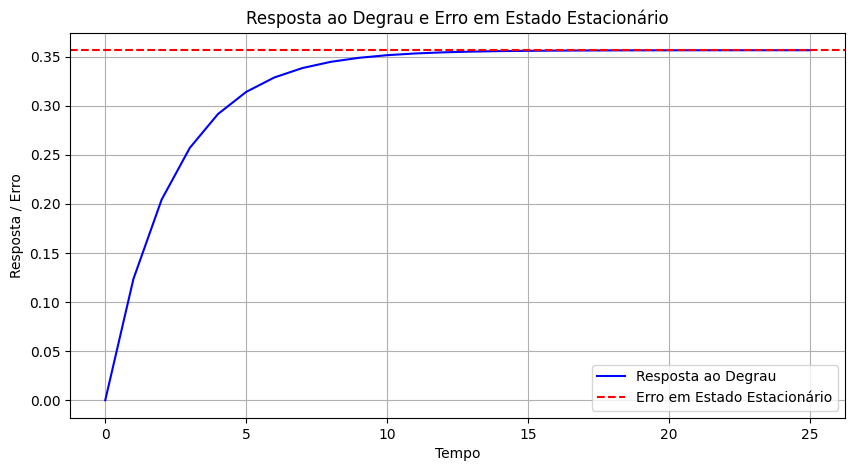

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema
num = [0.12354]
den = [1, -0.65346]
Cz = ctl.TransferFunction(num, den, True)

# Cálculo erro em estado estacionário e resposta ao degrau
s_s = ctl.step_info(Cz)['SteadyStateValue']
T, yout = ctl.step_response(Cz)

# Plotando a resposta ao degrau e o erro em estado estacionário
plt.figure(figsize=(10, 5))
plt.plot(T, yout, 'b-', label='Resposta ao Degrau')
plt.axhline(y=s_s, color='r', linestyle='--', label='Erro em Estado Estacionário')
plt.title('Resposta ao Degrau e Erro em Estado Estacionário')
plt.xlabel('Tempo')
plt.ylabel('Resposta / Erro')
plt.legend()
plt.grid(True)
plt.show()

2- Neste exercício o objetivo é deslocar o sinal distúrbio até a entrada antes do controlador como mostrado a seguir:

<img alt="disturbio" src="anexos/disturbio.jpg" title="disturbio planta" width="500">

<img alt="disturbio" src="anexos/disturbio_desejado.jpg" title="disturbio planta 2" width="500">

Para realizar esta modificação, o resultado será pela manipulação de blocos:

$$AD(Z) = \frac{D(z)}{K}$$

Considerando entrada nula, prevalece só distúrbio:

$$ C(z) = AD(Z)*\frac{0.12354}{z - 0.65346} $$

$$ C(z) = \frac{D(Z)}{K}*\frac{0.12354}{z - 0.65346} $$

$$ C(z) = \frac{D(Z)}{0.2}*\frac{0.12354}{z - 0.65346} $$

$$ C(z) = \frac{0.6177*D(Z)}{z - 0.65346} $$

Verficando o resultado considerando o distúrbio como 1, logo:

$$ C_D(z) = \frac{0.6177}{z - 0.65346} $$

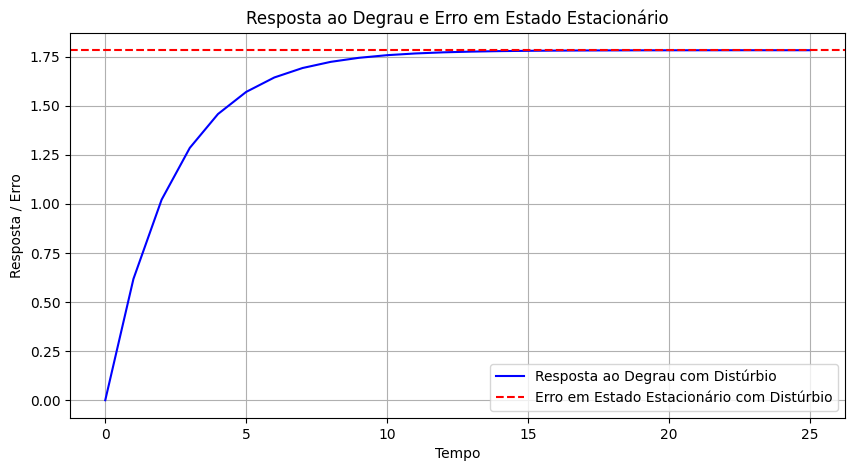

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema com Distúrbio
num = [0.6177]
den = [1, -0.65346]
CDz = ctl.TransferFunction(num, den, True)

# Cálculo erro em estado estacionário e resposta ao degrau com Distúrbio
s_s = ctl.step_info(CDz)['SteadyStateValue']
T, yout = ctl.step_response(CDz)

# Plotando a resposta ao degrau e o erro em estado estacionário com Distúrbio
plt.figure(figsize=(10, 5))
plt.plot(T, yout, 'b-', label='Resposta ao Degrau com Distúrbio')
plt.axhline(y=s_s, color='r', linestyle='--', label='Erro em Estado Estacionário com Distúrbio')
plt.title('Resposta ao Degrau e Erro em Estado Estacionário')
plt.xlabel('Tempo')
plt.ylabel('Resposta / Erro')
plt.legend()
plt.grid(True)
plt.show()

3- De maneira teórica o tempo de acomodação é definido por (sendo T = 1) para uma faixa de 2%, para encontrar o tempo se realiza o cálculo abaixo:

$$ T_s = \frac{−T*ln(0.02)}{ln(0.65346)} $$

$$ T_s = \frac{log(0.02)}{log(0.65346)}$$

$$ T_s = 9.1945s $$

A seguir realizando por meio da função step_info da biblioteca control do python o valor encontrado é de 10 para o tempo de acomodação, o motivo para esta discrepância se deve a forma que a biblioteca executa em tempo discreto, enquanto a de cima calcula em tempo contínuo usando a FT da planta discreta em Z.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema
num = [0.12354]
den = [1, -0.65346]
Cz = ctl.TransferFunction(num, den, True)

# Cálculo erro em estado estacionário e resposta ao degrau
degrau = ctl.step_info(Cz)
t_ss = degrau['SettlingTime']
print(f"Tempo de acomodação é: {t_ss}")

Tempo de acomodação é: 10.0


Demonstração usando outro método por meio de steps:

In [7]:
Y_anterior, Y_atual = 0, 0
amostras = 1
while Y_atual < .3492:
    Y_atual = Y_anterior * .65346 + .12354
    Y_anterior = Y_atual
    print(f"Y_atual: {Y_atual:.4f} | Y_anterior: {Y_anterior:.4f} | nº amostras: {amostras}")
    amostras=amostras+1

Y_atual: 0.1235 | Y_anterior: 0.1235 | nº amostras: 1
Y_atual: 0.2043 | Y_anterior: 0.2043 | nº amostras: 2
Y_atual: 0.2570 | Y_anterior: 0.2570 | nº amostras: 3
Y_atual: 0.2915 | Y_anterior: 0.2915 | nº amostras: 4
Y_atual: 0.3140 | Y_anterior: 0.3140 | nº amostras: 5
Y_atual: 0.3287 | Y_anterior: 0.3287 | nº amostras: 6
Y_atual: 0.3384 | Y_anterior: 0.3384 | nº amostras: 7
Y_atual: 0.3446 | Y_anterior: 0.3446 | nº amostras: 8
Y_atual: 0.3488 | Y_anterior: 0.3488 | nº amostras: 9
Y_atual: 0.3514 | Y_anterior: 0.3514 | nº amostras: 10
 Y_atual: 0.3514 | Y_anterior: 0.3514 | nº amostras: 11


Aqui está o cálculo utilizado para chegar no procedimento anterior:

$$ \frac{Y(z)}{R(z)} = \frac{0.12354}{z - 0.65346} $$

$$ z*Y(z) - 0.65346*Y(z) = 0.12354*R(z) $$

$$ Y(z) - 0.65346*z^{-1}*Y(z) = 0.12354*z^{-1}*R(z) $$

$$ Y[k] - 0.65346*Y[k-1] = 0.12354*R[k-1] $$

$$ Y[k] = 0.12354*R[k-1] + 0.65346*Y[k-1] $$

4- Por conta da caracteristica do sistema discreto haverá sobressinal e pode ser estimado utilizando solução númerica e analítica utilizando a fórmula de primeira ordem para o sistema contínuo:

Planta:  $$G(s) = \frac{2.77}{(130s +1)}$$

Planta discretizada com controlador: $$C_{ma}(z) = \frac{K * 0.20508781}{(z - 0.92596108)}$$

Sistema M.F.:  $$C_{mf}(z) = \frac{K * 0.20508781}{(z - 0.92596108 + K * 0.20508781)}$$

K encontrado: 5.49

-------

K = 5.48, Sobressinal: 19.79%, Tempo de Acomodação: 30.00
K = 5.49, Sobressinal: 20.00%, Tempo de Acomodação: 30.00
K = 5.50, Sobressinal: 20.20%, Tempo de Acomodação: 30.00


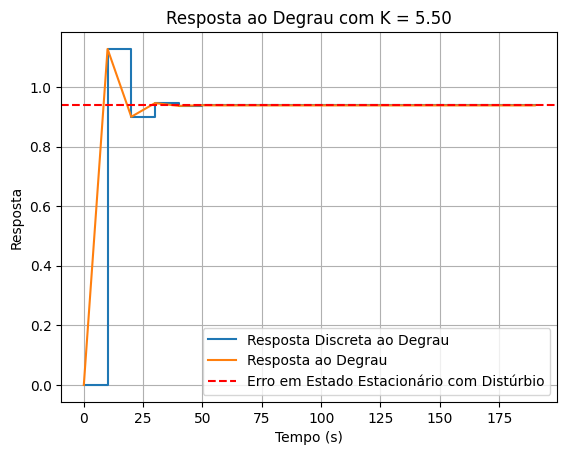

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definir parâmetros iniciais
K = 5.48  # Valor inicial de K
desired_overshoot = 20  # Sobressinal máximo desejado
min_settling_time = float('inf')  # Inicializar com um valor infinito
sampling_time = 10  # Tempo de amostragem
s_s = 1

# Executar a simulação e ajustar K
while True:
    num = [K * 0.20508781]
    den = [1, -0.92596108]
    Gz_k = ctl.TransferFunction(num, den, sampling_time)
    Cz_K = ctl.feedback(Gz_k, 1)

    # Simulação de resposta ao degrau
    time, response = ctl.step_response(Cz_K)

    # Calculando sobressinal e estado estacionário
    steady_state = response[-1]
    overshoot = (max(response) - steady_state) / steady_state * 100

    # Encontrar o tempo de acomodação para erro de 2%
    settling_time_indices = np.where(abs(response - steady_state) <= 0.02 * steady_state)[0]
    if settling_time_indices.size > 0:
        settling_time = time[settling_time_indices[0]]
    else:
        settling_time = float('inf')  # Caso não haja acomodação dentro do critério

    print(f"K = {K:.2f}, Sobressinal: {overshoot:.2f}%, Tempo de Acomodação: {settling_time:.2f}")
    s_s = ctl.step_info(Cz_K)['SteadyStateValue']
    
    # Critério de parada
    if overshoot <= desired_overshoot and settling_time < min_settling_time:
        min_settling_time = settling_time
        if overshoot < desired_overshoot - 5:  # Reduzir K se estiver muito abaixo do sobressinal desejado
            break
    elif overshoot > desired_overshoot:
        break  # Interrompe o loop se o sobressinal exceder o limite
    
    K += 0.01  # Incrementar K

# Plotar a resposta ao degrau final com o K que minimiza ts sem exceder o sobressinal
plt.figure()
plt.step(time, response, where='post', label='Resposta Discreta ao Degrau')
plt.plot(time, response, label='Resposta ao Degrau')
plt.axhline(y=s_s, color='r', linestyle='--', label='Erro em Estado Estacionário com Distúrbio')
plt.title(f"Resposta ao Degrau com K = {K:.2f}")
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid(True)
plt.show()

Função de Transferência Discreta G(z):
Numerador: [0.20508781]
Denominador: [ 1.         -0.92596108]


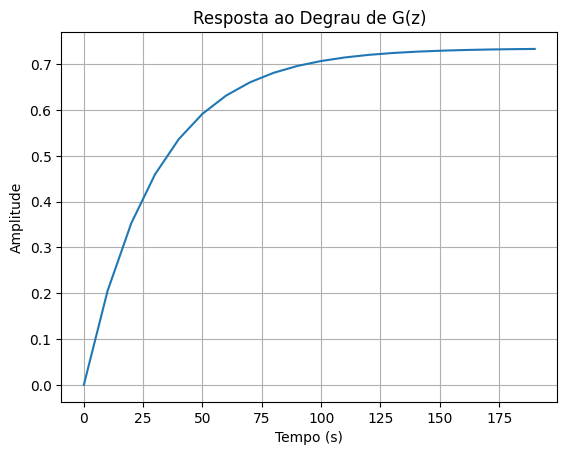

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência do sistema com Distúrbio
num = [2.77]
den = [130, 1]
Gs = ctl.TransferFunction(num, den)

# Definindo o período de amostragem
Ts = 10  # Defina de acordo com sua necessidade ou limite de Nyquist

# Discretizando a função de transferência usando o método Tustin
Gz = ctl.sample_system(Gs, Ts, method='zoh')

# Exibindo a função de transferência discreta em termos de z
print("Função de Transferência Discreta G(z):")
print('Numerador:', Gz.num[0][0])  # Exibe os coeficientes do numerador
print('Denominador:', Gz.den[0][0])  # Exibe os coeficientes do denominador
Cz_K = ctl.feedback(Gz_k, 1)

# Plotando a resposta ao degrau da função discreta
plt.figure()
t, y = ctl.step_response(Cz_K)
plt.plot(t, y)
plt.title('Resposta ao Degrau de G(z)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()